# Titanic Predictions Project

The goal of this project is to perform exploratory data analysis, feature engineering, and machine learning to make predictions of who survived the Titanic. The data comes from Kaggle.com's competition. In this project, I used the training set because it indicates whether or not a person survived. 

Kaggle dataset: https://www.kaggle.com/c/titanic/data 

In [1]:
## Importing the libraries that I need

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
%matplotlib inline

# Exploratory Data Analysis 

### Importing the Titanic Dataset 

In [41]:
## Importing the dataset from my local computer. 

df = pd.read_csv('Titanic.csv')

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Explanation of the columns 

PassengerId: Index of the original dataset

Survived: 1 if the person survived, 0 if the person did not survive

Pclass: Ticket class of the passenger

Name: Name of the passenger

Sex: Sex of the passenger

Age: Age of the passenger

SibSp: Number of siblings or spouses that the passenger had on board the Titanic

Parch: Number of parents or children that the passenger had on board the titanic

Ticket: Ticket number of the passenger

Fare: Amount of money that the passenger paid for thier ticket

Cabin: Cabin number of the passenger

Embarked: Where the passenger began their trip. C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There is missing data in the Age column, so that will have to be dealt with later

The PassengerId Column will not provide any helpful information because it is another index, so it can be dropped

In [5]:
df['PassengerId'].value_counts()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

In [43]:
df.drop('PassengerId', axis=1, inplace=True)

In [44]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Examining the Pclass column 

In [8]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

The majority of passengers travelled in 3rd class

C:\Users\barbal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

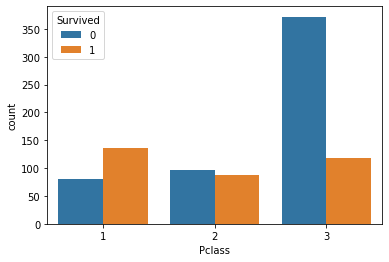

In [9]:
sns.countplot('Pclass', data=df, hue='Survived')

The survival rate of third class passengers is much lower than the survival rate of the first and second class passengers

#### Examining the Sex column  

C:\Users\barbal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

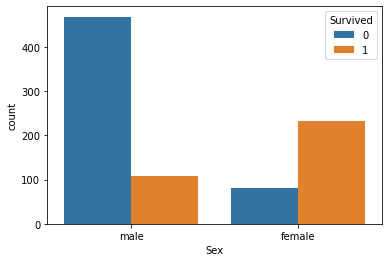

In [10]:
sns.countplot('Sex', data=df, hue='Survived')

The survival rate of males is much lower than the survival rate of females

#### Examining the SibSp column 

C:\Users\barbal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

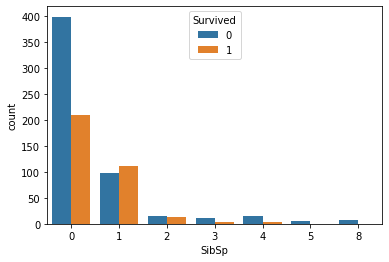

In [11]:
sns.countplot('SibSp', data=df, hue='Survived')

The largest share of passengers has a SibSp value of 0, so the majority of passengers were single and not travelling with a family. 

#### Examining the Parch column 

C:\Users\barbal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

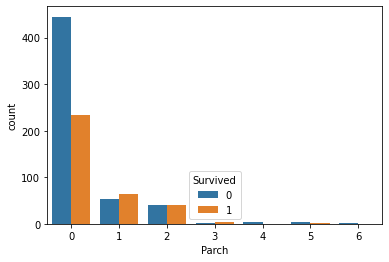

In [12]:
sns.countplot('Parch', data=df, hue='Survived')

The largest share of passengers have a Parch value of 0, so the majority of passengers were not travelling with their family.

#### Examining the Age column 

28.0

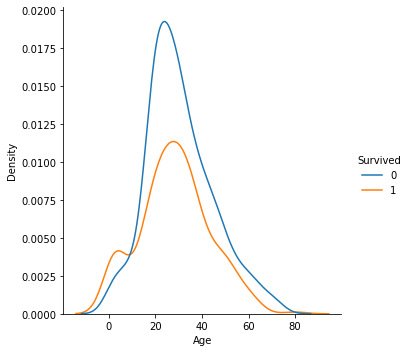

In [38]:
sns.displot(data=df, x='Age', hue='Survived', kind='kde')

df['Age'].dropna().median()


The median age of the Titanic passengers was 28 years old. Younger passengers were more likely to survive, and older passengers were less likely to survive

#### Examining the Fare column 

14.4542

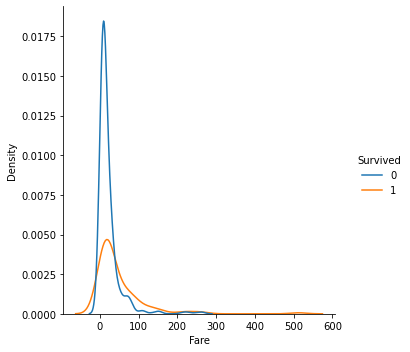

In [39]:
sns.displot(data=df, x='Fare', hue='Survived', kind='kde')

df['Fare'].median()

The median fare on the Titanic was $14.45, and the majority of passengers who paid close to the median did not survive. 

#### Examining the Embarked column 

C:\Users\barbal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

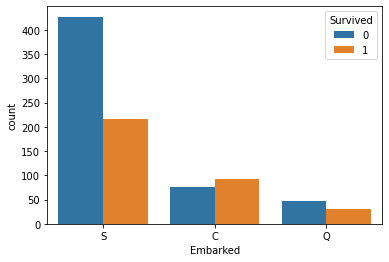

In [64]:
sns.countplot('Embarked', data=df, hue='Survived')

The survival rate for passengers who embarked at Southampton is much lower than the other departing cities

# Feature Engineering

#### Examining the Ticket column 

In [45]:
df['Ticket'].value_counts()

347082               7
1601                 7
CA. 2343             7
347088               6
CA 2144              6
                    ..
STON/O 2. 3101292    1
28206                1
219533               1
347076               1
31028                1
Name: Ticket, Length: 681, dtype: int64

The tickets with the prefixes could provide a useful datapoint, but first the punctuation needs to be removed, and the strings should all be lower case

In [46]:
#Function removes the punctuation in a string
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '').lower()
    return text

#Call to test the remove_punctuation function
remove_punctuation('A/c')

'ac'

In [47]:
# If the first word of the string is nonnumeric, return the string prior 
# to the space, else return 'Numeric'

def get_nonnumeric_prefix(text):
    if text.split()[0].isnumeric() == False:
        return text.split()[0]
    else:
        return 'Numeric'

#Call to test out the function
get_nonnumeric_prefix('21171')

'Numeric'

In [48]:
# Apply the functions to the dataframe

df['Ticket Prefix'] = df['Ticket'].apply(lambda string: remove_punctuation(string))
df['Ticket Prefix'] = df['Ticket Prefix'].apply(lambda string: get_nonnumeric_prefix(string))
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket Prefix
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,a5
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,pc
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,stono2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Numeric
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Numeric


In [49]:
df['Ticket Prefix'].value_counts()

Numeric    661
pc          60
ca          41
a5          21
sotonoq     15
stono       12
scparis     11
wc          10
a4           7
soc          6
stono2       6
fcc          5
c            5
line         4
pp           3
wep          3
scah         3
sopp         3
ppp          2
swpp         2
sotono2      2
sop          1
as           1
fc           1
fa           1
sc           1
sca4         1
casoton      1
scow         1
sp           1
Name: Ticket Prefix, dtype: int64

C:\Users\barbal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ticket Prefix', ylabel='count'>

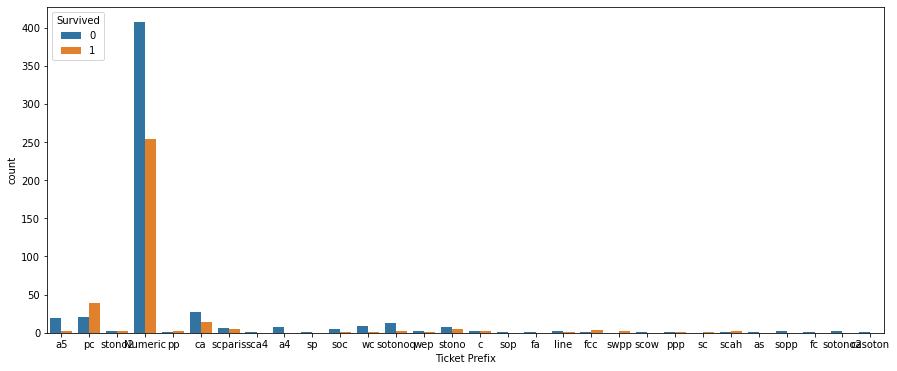

In [51]:
plt.figure(figsize=(15,6))
sns.countplot('Ticket Prefix', data=df, hue='Survived')

Since many of the ticket prefixes only occur once, there is not a strong correlation between having a ticket prefix and surviving, and I do not know what the ticket prefix actually represents, I will drop the Ticket and Ticket Prefix columns. 

In [52]:
df.drop(['Ticket', 'Ticket Prefix'], axis=1, inplace=True)

In [53]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


#### Splitting the female passengers by marital status could be a predictive datapoint 

In [54]:
# Split the name string by the comma and select the first three characters
# Mrs = Married Female
# Mis or Ms. = Unmarried Female
# Mr. = Male

def marital_status(name):
    prefix = name.split(',')[1][1:4]
    if prefix == 'Mrs':
        return 'Married Female'
    if (prefix == 'Mis') | (prefix == 'Ms.'):
        return 'Unmarried Female'
    else:
        return 'Male'

# Testing the function
marital_status('Luke, Miss Barba')

'Unmarried Female'

In [55]:
df['Marital_Status'] = df['Name'].apply(marital_status)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Marital_Status
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Male
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Married Female
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Unmarried Female
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Married Female
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Male


C:\Users\barbal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

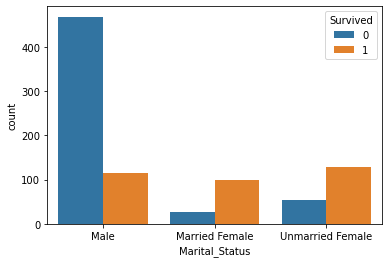

In [56]:
sns.countplot('Marital_Status', data=df, hue='Survived')

The marital status column could be useful when converted to dummy variables since unmarried females were less likely to survive

#### Exploring the Cabin column 

In [58]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
E101           3
              ..
A26            1
E36            1
B86            1
E50            1
B50            1
Name: Cabin, Length: 147, dtype: int64

Getting the first letter of the cabin could be predictive

In [59]:
#Convert the Cabin column contents to strings

df['Cabin'] = df['Cabin'].astype('str')

In [60]:
df['Cabin_Letter'] = df['Cabin'].apply(lambda string: string[0:1])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Marital_Status,Cabin_Letter
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,nan,S,Male,n
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Married Female,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,nan,S,Unmarried Female,n
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Married Female,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,nan,S,Male,n


In [61]:
df['Cabin_Letter'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Letter, dtype: int64

A Cabin_Letter value of 'n' indicates that the passenger's cabin was unknown

C:\Users\barbal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cabin_Letter', ylabel='count'>

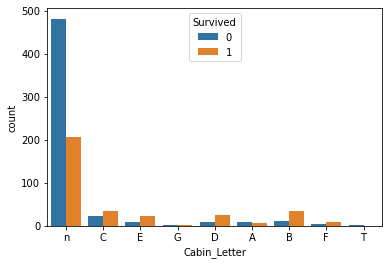

In [62]:
sns.countplot('Cabin_Letter', data=df, hue='Survived')

Having a marked cabin gives a better chance of survival

In [63]:
# Dropping the columns that are now redundant

df.drop(['Name', 'Sex', 'Cabin'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Marital_Status,Cabin_Letter
0,0,3,22.0,1,0,7.2500,S,Male,n
1,1,1,38.0,1,0,71.2833,C,Married Female,C
2,1,3,26.0,0,0,7.9250,S,Unmarried Female,n
3,1,1,35.0,1,0,53.1000,S,Married Female,C
4,0,3,35.0,0,0,8.0500,S,Male,n


#### Need to replace the missing values in the Age column

In [65]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Marital_Status', ylabel='Age'>

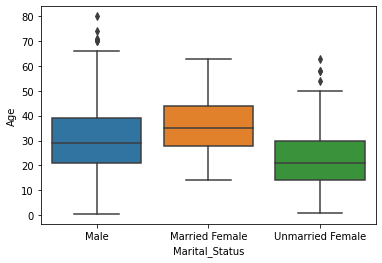

In [68]:
sns.boxplot(x='Marital_Status', y='Age', data=df)


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

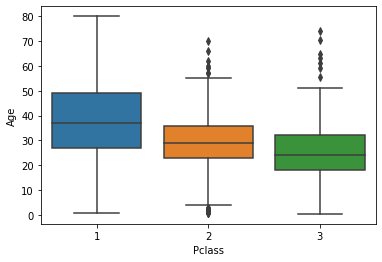

In [69]:
sns.boxplot(x='Pclass', y='Age', data=df)

Filling in the missing ages based on the passenger's class would be a better way to fill in the missing values because the median age is inversely proportional to the class

In [70]:
age_medians = df.groupby('Pclass').median()['Age']
age_medians

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [71]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37.0
        elif Pclass == 2:
            return 29.0
        else:
            return 24.0
    else:
        return Age

In [72]:
df['Age'] = df[['Age', 'Pclass']].apply(fill_age, axis=1)

In [73]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Marital_Status,Cabin_Letter
0,0,3,22.0,1,0,7.2500,S,Male,n
1,1,1,38.0,1,0,71.2833,C,Married Female,C
2,1,3,26.0,0,0,7.9250,S,Unmarried Female,n
3,1,1,35.0,1,0,53.1000,S,Married Female,C
4,0,3,35.0,0,0,8.0500,S,Male,n


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    int64  
 2   Age             891 non-null    float64
 3   SibSp           891 non-null    int64  
 4   Parch           891 non-null    int64  
 5   Fare            891 non-null    float64
 6   Embarked        889 non-null    object 
 7   Marital_Status  891 non-null    object 
 8   Cabin_Letter    891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


No more missing age values! There are two rows with missing embarked values, so it is best to drop those rows

In [75]:
df.dropna(inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        889 non-null    int64  
 1   Pclass          889 non-null    int64  
 2   Age             889 non-null    float64
 3   SibSp           889 non-null    int64  
 4   Parch           889 non-null    int64  
 5   Fare            889 non-null    float64
 6   Embarked        889 non-null    object 
 7   Marital_Status  889 non-null    object 
 8   Cabin_Letter    889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


No more missing data!

#### Converting the categorical data to dummy variables 

In [77]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Marital_Status,Cabin_Letter
0,0,3,22.0,1,0,7.2500,S,Male,n
1,1,1,38.0,1,0,71.2833,C,Married Female,C
2,1,3,26.0,0,0,7.9250,S,Unmarried Female,n
3,1,1,35.0,1,0,53.1000,S,Married Female,C
4,0,3,35.0,0,0,8.0500,S,Male,n


In [78]:
# Creating the dummy variables

Embark = pd.get_dummies(df['Embarked'], drop_first=True)
Marital_Status = pd.get_dummies(df['Marital_Status'], drop_first=True)
cabin_Letter = pd.get_dummies(df['Cabin_Letter'], drop_first=True)

In [79]:
# Dropping the nonnumeric columns that are now redundant

df.drop(['Embarked', 'Marital_Status','Cabin_Letter'], axis=1, inplace=True)

In [80]:
# Concatenating into a single dataframe

df = pd.concat([df, Embark, Marital_Status, cabin_Letter], axis=1)

In [81]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,Married Female,Unmarried Female,B,C,D,E,F,G,T,n
0,0,3,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,1,0,0,1,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,1,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,1,0,0,1,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,0,0,0,0,0,0,0,1


The dataframe is ready to go into the machine learning model!

# Building, Training, and Testing the Model

#### Trying a simple logistic regression model first 

In [82]:
# importing the libraries to do a simple logistic regression algorithm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S',
       'Married Female', 'Unmarried Female', 'B', 'C', 'D', 'E', 'F', 'G', 'T',
       'n'],
      dtype='object')

In [84]:
# Splitting up the features and the outputs

X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S',
       'Married Female', 'Unmarried Female', 'B', 'C', 'D', 'E', 'F', 'G', 'T',
       'n']]
y = df['Survived']

In [85]:
# Train, test split
# Use 30% of the data for testing the algorithm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [86]:
# Creating the logistic regression model

logmodel = LogisticRegression()

In [87]:
# fitting the model on the training data

logmodel.fit(X_train, y_train)

C:\Users\barbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
# Making the predictions on the test data

predictions = logmodel.predict(X_test)

In [89]:
# Classification report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.71      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.82      0.82       267
weighted avg       0.84      0.84      0.84       267



The simple logistic regression model is 84% accurate

In [90]:
# Confusion Matrix

print(confusion_matrix(y_test, predictions))

[[150  13]
 [ 30  74]]


Out of the 267 passengers that made up the test dataset, there were 13 false positives, and 30 false negatives

#### Maybe a neural network will do a better job at the classification than a simple logistic regression 

In [91]:
# importing a scaler

from sklearn.preprocessing import MinMaxScaler

In [92]:
# Creating the scaler

scaler = MinMaxScaler()

In [93]:
# Fitting the scaler to the training features

scaler.fit(X_train)

MinMaxScaler()

In [94]:
# Transforming the features of the training and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
# importing the libraries to create the neural network

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [98]:
# Creating a three layer neural network with 30, 15, and 1 nodes
model = Sequential()
# #0 nodes, relu activation function
model.add(Dense(units=30,activation='relu'))
# Adding in dropout layers to prevent overfitting
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
# binary crossentropy loss function and adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')

In [100]:
# fitting the model with early stopping to reduce overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
20/20 [==============================] - 1s 13ms/step - loss: 0.6929 - val_loss: 0.6424
Epoch 2/600
20/20 [==============================] - 0s 3ms/step - loss: 0.6597 - val_loss: 0.6251
Epoch 3/600
20/20 [==============================] - 0s 4ms/step - loss: 0.6615 - val_loss: 0.6140
Epoch 4/600
20/20 [==============================] - 0s 3ms/step - loss: 0.6353 - val_loss: 0.6037
Epoch 5/600
20/20 [==============================] - 0s 3ms/step - loss: 0.6435 - val_loss: 0.5954
Epoch 6/600
20/20 [==============================] - 0s 3ms/step - loss: 0.6275 - val_loss: 0.5867
Epoch 7/600
20/20 [==============================] - 0s 4ms/step - loss: 0.6316 - val_loss: 0.5775
Epoch 8/600
20/20 [==============================] - 0s 3ms/step - loss: 0.6125 - val_loss: 0.5691
Epoch 9/600
20/20 [==============================] - 0s 3ms/step - loss: 0.6115 - val_loss: 0.5593
Epoch 10/600
20/20 [==============================] - 0s 3ms/step - loss: 0.5964 - val_loss: 0.5510
Epoch 11

20/20 [==============================] - 0s 4ms/step - loss: 0.4511 - val_loss: 0.4113
Epoch 84/600
20/20 [==============================] - 0s 4ms/step - loss: 0.4473 - val_loss: 0.4114
Epoch 85/600
20/20 [==============================] - 0s 4ms/step - loss: 0.4451 - val_loss: 0.4105
Epoch 86/600
20/20 [==============================] - 0s 4ms/step - loss: 0.4334 - val_loss: 0.4080
Epoch 87/600
20/20 [==============================] - 0s 5ms/step - loss: 0.4415 - val_loss: 0.4104
Epoch 88/600
20/20 [==============================] - 0s 4ms/step - loss: 0.4211 - val_loss: 0.4113
Epoch 89/600
20/20 [==============================] - 0s 3ms/step - loss: 0.4549 - val_loss: 0.4127
Epoch 90/600
20/20 [==============================] - 0s 3ms/step - loss: 0.4792 - val_loss: 0.4109
Epoch 91/600
20/20 [==============================] - 0s 3ms/step - loss: 0.5024 - val_loss: 0.4152
Epoch 92/600
20/20 [==============================] - 0s 3ms/step - loss: 0.4456 - val_loss: 0.4117
Epoch 93/600


<AxesSubplot:>

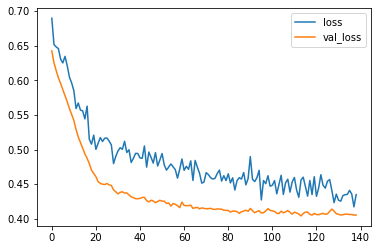

In [101]:
# Plot the loss and validation loss to see if there was overfitting

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Not too much overfitting.

In [102]:
# Use the neural network to make predictions

preds = model.predict_classes(X_test)

C:\Users\barbal\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [103]:
# Print the neural network classification report and confusion matrix

print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       163
           1       0.90      0.66      0.76       104

    accuracy                           0.84       267
   macro avg       0.86      0.81      0.82       267
weighted avg       0.85      0.84      0.83       267



In [104]:
print(confusion_matrix(y_test,preds))

[[155   8]
 [ 35  69]]


The neural network was still 84% accurate, and it made fewer negative predictions than the simple logistic regression model (77 negative predictions from the neural network vs. 87 negative predictions from the simple model) 